In [1]:
#import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
import warnings
warnings.filterwarnings('ignore')




In [2]:
#read the file
df=pd.read_csv('hotel_booking.csv',parse_dates=['reservation_status_date'])



In [3]:
#EXPLORATORY DATA ANALYSIS AND DATA CLEANING

df.head() # for starting 5 rows
df.tail()# for last 5 rows
df.shape # return no of rows and col in dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [ ]:
df.info()  # to know datatype,null,notnull
df.info()
df.describe(include='object')
for col in df.describe(include='object').columns:
  print (col)
  print(df[col].unique())
  print('-'*50)

In [ ]:
df.isnull().sum() # tot no of missing val in each col

In [ ]:
df.dropna(axis=0, how='any',  subset=None, inplace=True) # remove col with missing values
print(df)

In [ ]:
df.isnull().sum()


In [ ]:
df.describe()

In [ ]:
df=df[df['adr']<5000] #set range to remove outliers

In [ ]:
df.describe()

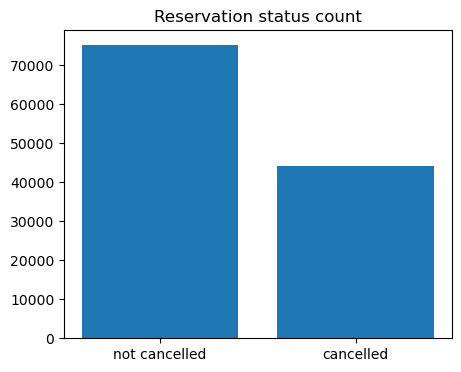

In [4]:
#DATA ANALYSIS AND VISUALIAZTION
cancelled_perc=df['is_canceled'].value_counts(normalize=True) #perc of cancellation
cancelled_perc  
plt.figure(figsize=(5,4))
plt.title('Reservation status count')

plt.bar(['not cancelled','cancelled'],df['is_canceled'].value_counts())
plt.show()

 #62% is not cancelled      37 %  is cancelled

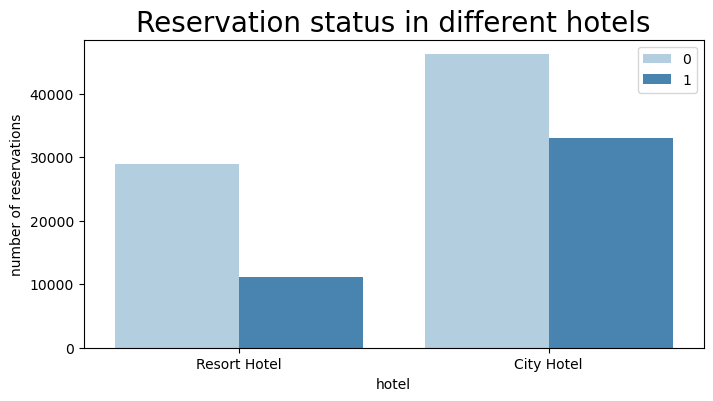

In [5]:
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='hotel',hue='is_canceled',data=df,palette='Blues')
legend_labels=ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status in different hotels',size=20)
plt.xlabel('hotel')# x axis
plt.ylabel('number of reservations')# yaxis
plt.show()

In [6]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)  #perc count of cancellation and non camcellation of resort hotel

0    0.722366
1    0.277634
Name: is_canceled, dtype: float64

In [7]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)  #perc count of cancellation and non cancellation of city hotel

0    0.58273
1    0.41727
Name: is_canceled, dtype: float64

In [ ]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean() # mean in terms of avg daily rate
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

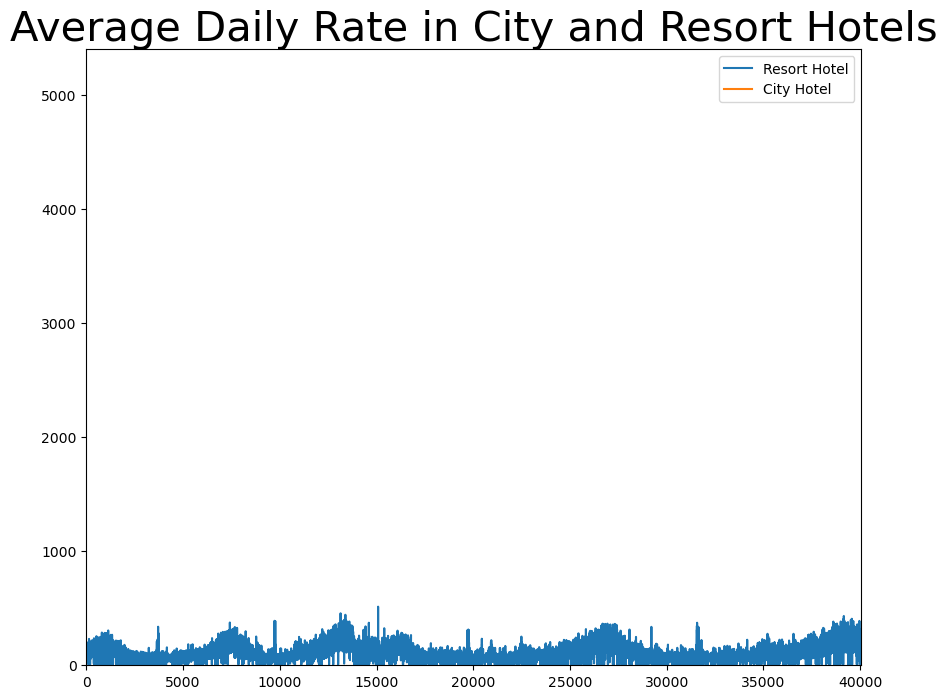

In [10]:
plt.figure(figsize=(10,8))
plt.title('Average Daily Rate in City and Resort Hotels',fontsize=30)
resort_hotel = resort_hotel.sort_index()
city_hotel = city_hotel.sort_index()
plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel')

# Adjust y-axis limits
plt.ylim(bottom=min(resort_hotel['adr'].min(), city_hotel['adr'].min()) - 10,
         top=max(resort_hotel['adr'].max(), city_hotel['adr'].max()) + 10)

plt.legend()
plt.xlim(min(resort_hotel.index), max(resort_hotel.index))
plt.ylim(min(min(resort_hotel['adr']), min(city_hotel['adr'])),
         max(max(resort_hotel['adr']), max(city_hotel['adr'])))
plt.show()



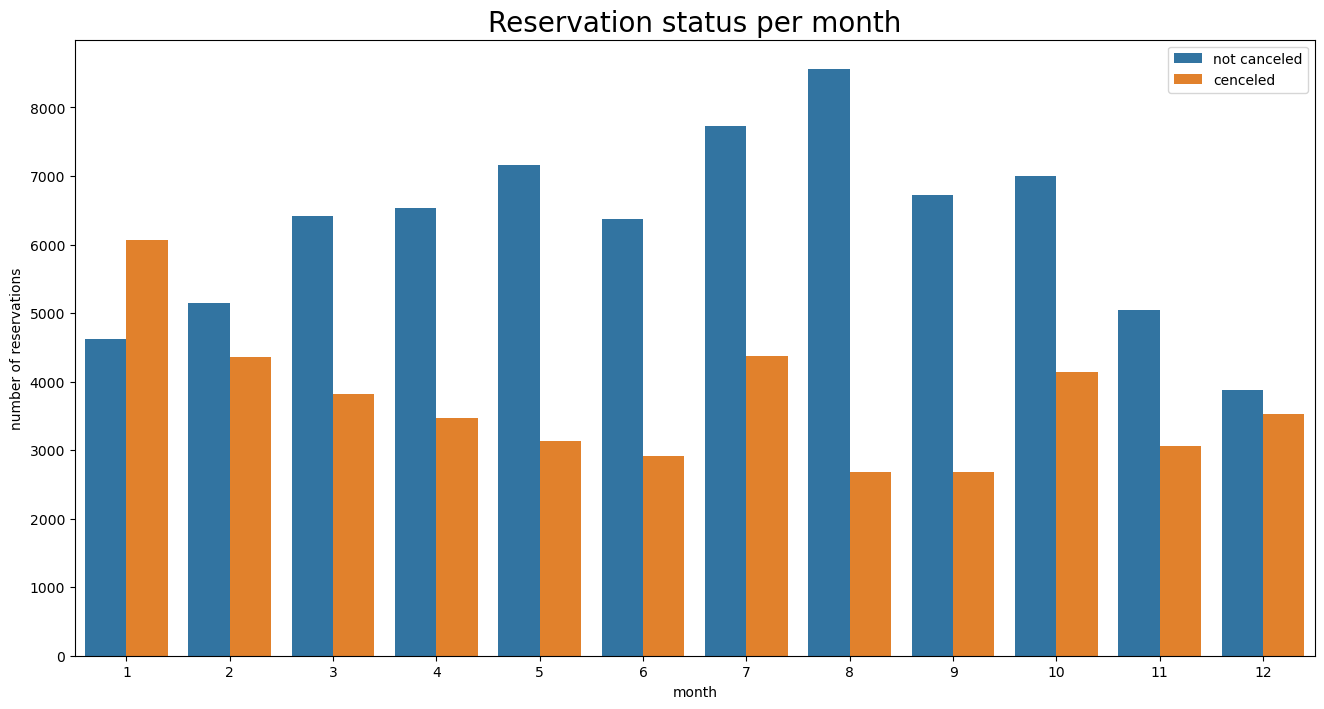

In [17]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x='month', hue='is_canceled',data=df)
legend_labels,_=ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month',size=20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled','cenceled'])
plt.show()

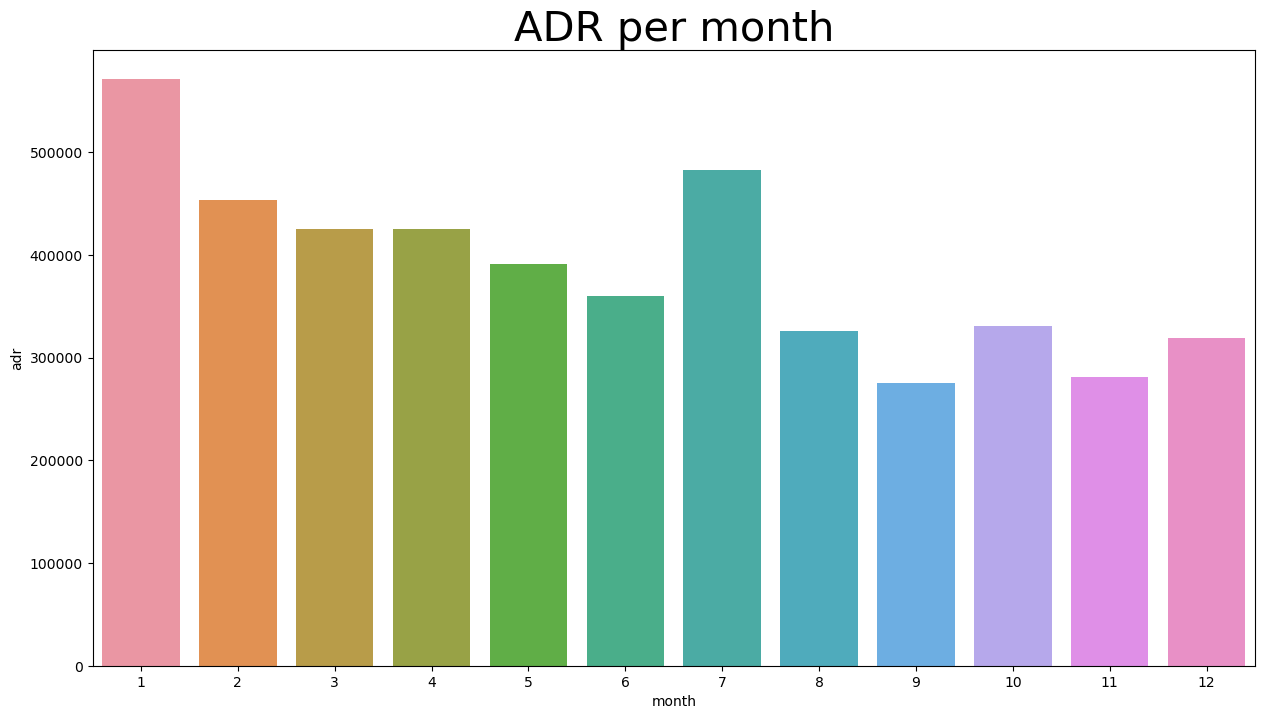

In [18]:
plt.figure(figsize=(15,8))
plt.title('ADR per month',fontsize=30)
sns.barplot('month','adr',data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.show()

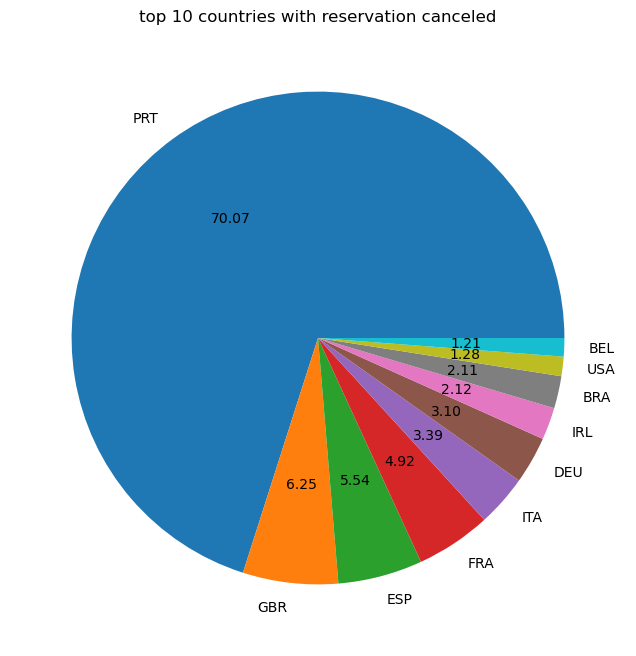

In [20]:
cancelled_data=df[df['is_canceled']==1]
top_10_country=cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title('top 10 countries with reservation canceled')
plt.pie(top_10_country,autopct='%.2f',labels=top_10_country.index)
plt.show()

In [21]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [22]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: market_segment, dtype: float64

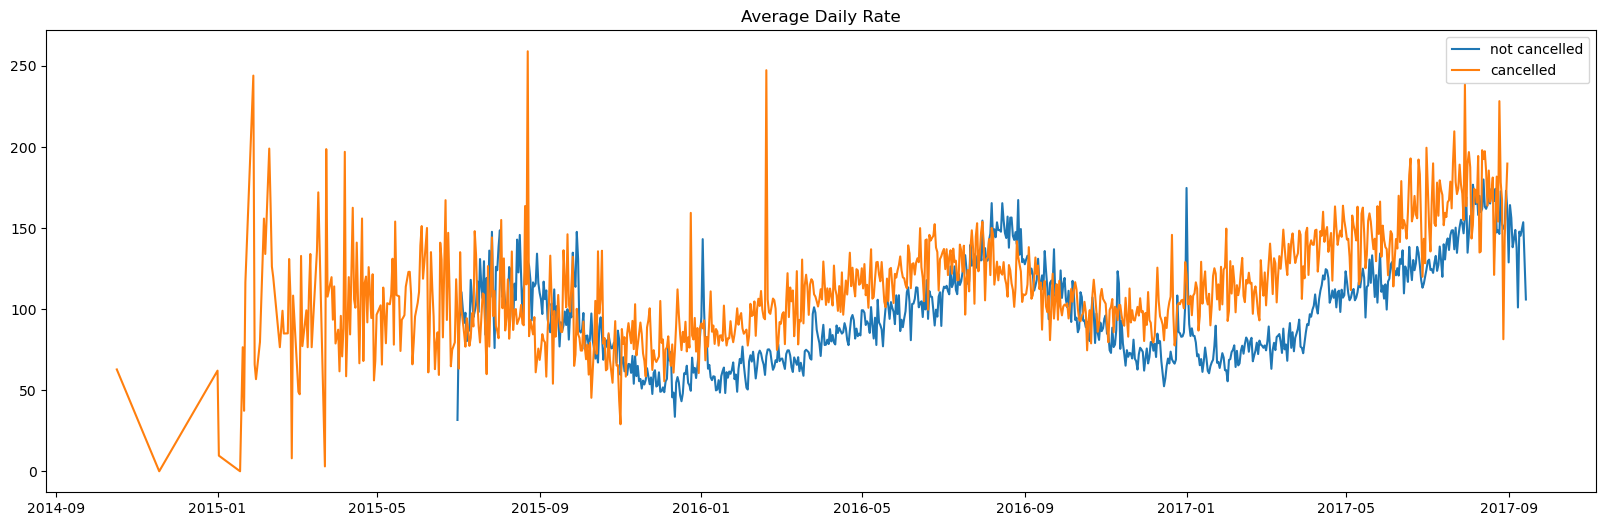

In [26]:
cancelled_df_adr=cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date',inplace=True)
not_cancelled_data=df[df['is_canceled']==0]
not_cancelled_df_adr=not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date',inplace=True)

plt.figure(figsize=(20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'],label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label='cancelled')
plt.legend()



In [27]:
cancelled_df_adr=cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016')&(cancelled_df_adr['reservation_status_date']<'2017-09')]
not_cancelled_df_adr=not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016')&(not_cancelled_df_adr['reservation_status_date']<'2017-09')]

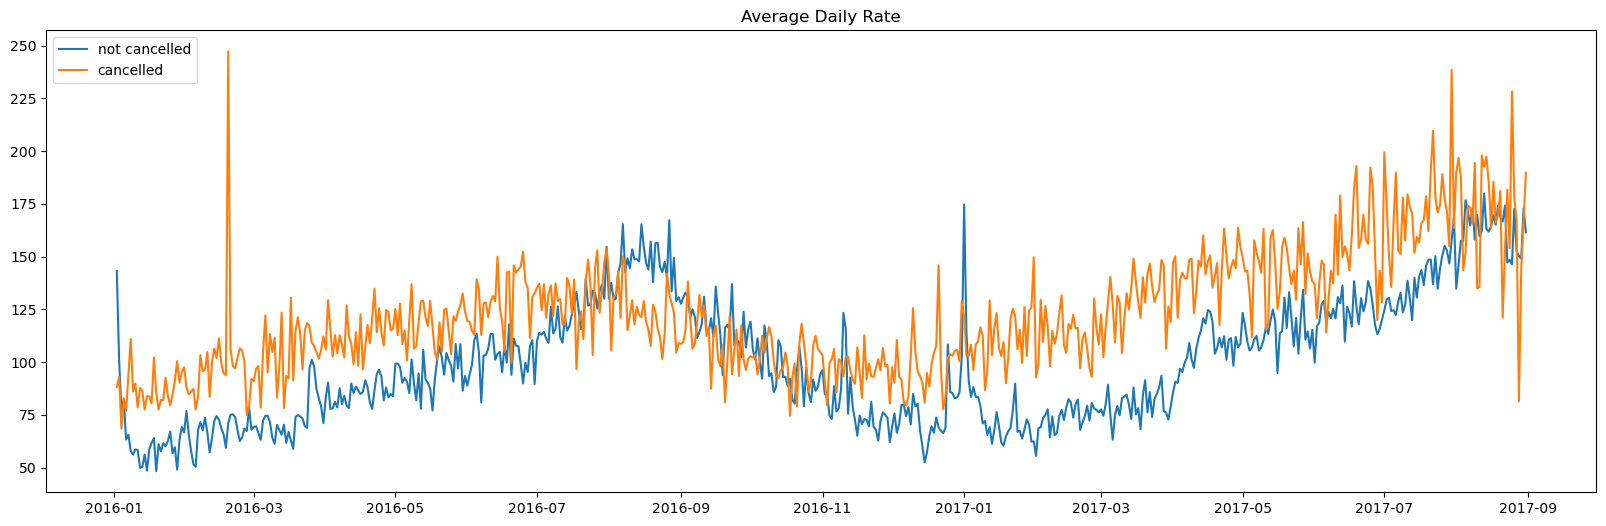

In [28]:
plt.figure(figsize=(20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'],label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label='cancelled')
plt.legend()